https://xgboost.readthedocs.io/en/stable/parameter.html



In [ ]:
!pip install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 61.8 MB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 147 kB 57.8 MB/s 
     |████████████████████████████████| 112 kB 56.3 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d7f73ed92f34ec8118d6e24a1548fdd943ba54e447a6dbacd2f66beae19c1d8a
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

import optuna

import xgboost

from sklearn.metrics import make_scorer , accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold,train_test_split

In [ ]:
df = pd.read_csv('/content/credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [ ]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
df = df.dropna(thresh=2)

In [ ]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
df.drop('Loan ID',axis=1,inplace=True)
df.drop('Customer ID',axis=1,inplace=True)

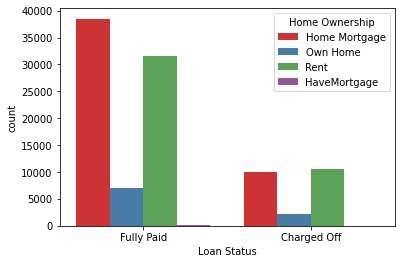

In [ ]:
ax = sns.countplot(x="Loan Status", data=df,hue="Home Ownership",palette="Set1")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


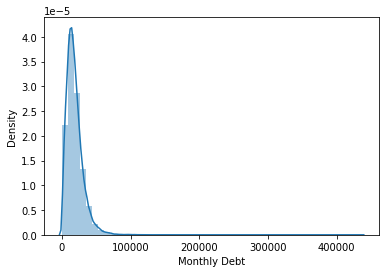

In [ ]:
sns.distplot(df["Monthly Debt"])

In [ ]:
df.drop(df.tail(514).index, inplace=True)

In [ ]:
df['Credit Score']=df['Credit Score'].fillna(pd.Series(np.random.choice(df['Credit Score'].dropna(),size=len(df.index))))
df['Bankruptcies'].fillna(df['Bankruptcies'].std(),inplace=True)
df['Annual Income']=df['Annual Income'].fillna(pd.Series(np.random.choice(df['Annual Income'].dropna(),size=len(df.index))))
df['Tax Liens'].fillna(df['Tax Liens'].std(),inplace=True)
df['Years in current job']=df['Years in current job'].fillna(pd.Series(np.random.choice(df['Years in current job'].dropna(),size=len(df.index))))
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean(),inplace=True)
df['Months since last delinquent']=df['Months since last delinquent'].fillna(pd.Series(np.random.choice(df['Months since last delinquent'].dropna(),size=len(df.index))))

In [ ]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['Term']=label_encoder.fit_transform(df['Term'])
df['Years in current job']=label_encoder.fit_transform(df['Years in current job'])
df['Home Ownership']=label_encoder.fit_transform(df['Home Ownership'])
df['Purpose']=label_encoder.fit_transform(df['Purpose'])
df['Loan Status']=label_encoder.fit_transform(df['Loan Status'])
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412,1,709.0,1167493.0,8,1,5,5214.74,17.2,5.0,6,1,228190,416746.0,1.0,0.0
1,1,262328,1,722.0,7753520.0,1,1,3,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,1,99999999,1,741.0,2231892.0,8,2,3,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,1,347666,0,721.0,806949.0,3,2,3,8741.90,12.0,7.0,9,0,256329,386958.0,0.0,0.0
4,1,176220,1,737.0,1334484.0,5,3,3,20639.70,6.1,30.0,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99481,0,464354,0,693.0,649971.0,8,1,3,14984.73,18.5,13.0,15,0,193971,331760.0,0.0,0.0
99482,1,170610,1,746.0,929594.0,10,3,3,14230.24,8.5,59.0,9,0,127262,192874.0,0.0,0.0
99483,0,369446,1,742.0,1313774.0,2,3,3,28136.72,14.1,80.0,19,0,337288,1365518.0,0.0,0.0
99484,1,342474,1,731.0,1230440.0,1,1,3,5362.56,18.2,75.0,6,1,131480,634370.0,1.0,0.0


In [ ]:
X = df.drop(labels='Loan Status', axis=1).values
y = df['Loan Status'].values
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

**DecisionTreeClassifier**

In [ ]:
%%time
dt =DecisionTreeClassifier(max_features=10 , max_depth=10)
dt.fit(x_train , y_train)
print(dt.score(x_train , y_train))
print(dt.score(x_test , y_test))

0.8201110720209077
0.8149060207055986
CPU times: user 520 ms, sys: 3.85 ms, total: 524 ms
Wall time: 526 ms


In [ ]:
%%time

parameters = {'max_depth':range(1,30), 'max_features':range(1,30)}
scorin_fnc = make_scorer(accuracy_score)
kflod = KFold(n_splits=10)
regressor = DecisionTreeClassifier()

grid = GridSearchCV(regressor,parameters,cv=kflod ,n_jobs=-1 )
grid = grid.fit(x_train,y_train)
reg = grid.best_estimator_
 
print('best score:%f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s:%d'%(key,reg.get_params()[key]))
 
print('test score : %f'%reg.score(x_test,y_test))

KeyboardInterrupt: ignored

In [ ]:
grid.best_score_

AttributeError: ignored

**DecisionTreeClassifier**

In [ ]:
%%time
rf = RandomForestClassifier(max_features=15,max_depth=15)
rf.fit(x_train , y_train)
print(rf.score(x_test , y_test))
print(rf.score(x_test , y_test))

In [ ]:
# param_dist = {
#         'max_features':range(80,200,4),
#         'max_depth':range(2,15,1)
#         }

rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': np.arange(200,501,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,15),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 6, n_jobs=-1)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_score_

In [ ]:
CV_rfc.best_params_

In [ ]:
CV_rfc.best_estimator_.score(x_test,y_test)

**RandomForestClassifier**

In [ ]:
%%time
Lg = LogisticRegression()
Lg.fit(x_train, y_train)
print(Lg.score(x_train , y_train))
print(Lg.score(x_test , y_test))

In [ ]:
grid={"C":np.arange(-20,20,0.5), "penalty":["l1","l2","none","elasticnet"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[200]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=6, n_jobs=-1)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])

In [ ]:
df_test.dropna(thresh=4)

In [ ]:
df_test.isnull().sum()

In [ ]:
#df_test.drop(df_test.tail(353).index, inplace=True)

In [ ]:
res = Lg.predict(df_test)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_logregr.csv', columns = header)



---



---



In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])


In [ ]:
df_test.dropna(thresh=4)

In [ ]:
df_test.isnull().sum()

In [ ]:
res = dt.predict(df_test)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_dectree.csv', columns = header)



---
XGBoost


In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9,0,621908,1058970,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11,0,679573,904442,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9,0,87058,234410,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8,1,99636,568370,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])


In [ ]:
df_test.dropna(thresh=4)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,611314,1,747.0,2074116.0,1,1,3,42000.83,21.8,44.0,9,0,621908,1058970,0.0,0.0
1,266662,1,734.0,1919190.0,1,1,3,36624.40,19.4,66.0,11,0,679573,904442,0.0,0.0
2,153494,1,709.0,871112.0,2,3,3,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,176242,1,727.0,780083.0,1,3,3,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,321992,1,744.0,1761148.0,1,1,3,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,157806,1,731.0,1514376.0,6,3,3,4795.41,12.5,15.0,9,0,87058,234410,0.0,0.0
9996,132550,1,718.0,763192.0,4,1,3,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,223212,0,6780.0,1027349.0,9,3,3,4354.42,27.2,68.0,8,1,99636,568370,1.0,0.0
9998,99999999,1,721.0,972097.0,1,1,3,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test.isnull().sum()

In [ ]:
params = {
        'booster':["gbtree","dart"],
        'min_child_weight': range(1,16,1),
        'gamma': np.arange(0.0,3.0,0.5),
        'subsample': np.linspace(0.1,1,12),
        'colsample_bytree': np.linspace(0.1,1,12),
        "max_depth":range(1,16,1),
        "learning_rate":np.linspace(0.1,1,12),
        "n_estimators":[100,200,300]
        }

In [ ]:
grid = HalvingGridSearchCV(estimator=XGBClassifier(), param_grid=params , scoring='roc_auc', n_jobs=-1, cv=6, verbose=2 )
grid.fit(x_train, y_train)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)



n_iterations: 8
n_required_iterations: 15
n_possible_iterations: 8
min_resources_: 24
max_resources_: 79588
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 13996800
n_resources: 24
Fitting 6 folds for each of 13996800 candidates, totalling 83980800 fits


In [ ]:
# y_test = grid.best_estimator_.predict(df_test)
# print(y_test)

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
res = xgb.predict(df_test)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_xgboost.csv', columns = header)

**OPTUNA XGBOOST**

In [ ]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        'nthread':-1,
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', np.arange(0.000,1,0.001)),
        'subsample': trial.suggest_categorical('subsample', np.linspace(0.00,1,200)),
        'learning_rate': trial.suggest_categorical('learning_rate', np.arange(0.000,3.0,0.005) ),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', np.arange(1,20,1)),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgboost.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=1000,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,
               show_progress_bar=True)
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

In [ ]:
Best_trial = study.best_trial.params
#Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial

In [ ]:
study.best_trial.value